# NY Uber dataset

All data was taken from fivethirtyeight's data:


https://github.com/fivethirtyeight/uber-tlc-foil-response

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [8]:
DATA_PATH = 'data/'


raw = pd.read_csv(DATA_PATH+'uber-raw-data-janjune-15.csv',parse_dates=['Pickup_date'])
locID = pd.read_csv(DATA_PATH+'taxi-zone-lookup.csv')

### Removing unpopular nodes

In [35]:
gpsData = pd.read_csv(DATA_PATH+'gps_zones.csv')
gpsData = gpsData.drop('Unnamed: 0',axis=1)
gpsData['Counts'] = raw['locationID'].value_counts().reindex(gpsData.LocationID.unique(), fill_value=0).values

Text(0.5, 1.0, 'Counts per zones')

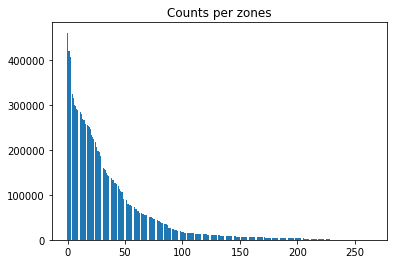

In [36]:
ordered = gpsData.sort_values(by='Counts',ascending=False)
plt.bar(range(len(ordered)),ordered['Counts'])
plt.title('Counts per zones')

In [37]:
gpsData = gpsData.drop(264)
gpsData = gpsData[gpsData['Counts']>100000]
gpsData.to_csv(DATA_PATH+'finalGpsMax.csv')
len(gpsData)

49